# Import datas

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import numpy as np

digits = load_digits()
X = digits['data']
Y = digits['target']

#enc = OneHotEncoder()
#Y = enc.fit_transform(Y.reshape(-1, 1))

X.shape, Y.shape

((1797, 64), (1797,))

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [3]:
import matplotlib.pyplot as plt
i = np.random.choice(range(len(X_train)))
plt.imshow(X_train[i].reshape(8,8))
plt.title(Y_train[i])
plt.show()

<Figure size 640x480 with 1 Axes>

# Define PyTorch model

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, n_features):
        super(Model, self).__init__()
        self.dense1 = nn.Linear(n_features, 16).double()
        self.relu1 = nn.ReLU().double()
        self.dropout1 = nn.Dropout(0.3).double()
        self.dense2 = nn.Linear(16, 10).double()
        self.softmax = nn.Softmax().double()
        self.history = {}
        
    def forward(self, x):
        out = x
        out = self.dense1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.dense2(out)
        out = self.softmax(out)
        return out
    
    def fit(self, X, Y, epochs, batch_size, validation_data=None):
        
        Loss = nn.CrossEntropyLoss(reduction='mean')
        
        def Accuracy(x,y):
            return (x.argmax(dim=1)==y).sum().float()/len(x)
        
        
        input = torch.tensor(X, requires_grad=True, dtype=torch.double)
        target = torch.tensor(Y, dtype=torch.long)
        
        if not validation_data is None:
            val_input = torch.tensor(validation_data[0], dtype=torch.double)
            val_target = torch.tensor(validation_data[1], dtype=torch.long)
        
        self.history['loss'] = []
        self.history['acc'] = []
        if not validation_data is None: self.history['val_loss'] = []
        if not validation_data is None: self.history['val_acc'] = []
    
        optimizer = optim.Adam(model.parameters(), lr=0.005, betas=(0.9, 0.999), eps=1e-08)
        #optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
        
        n_batch = np.ceil(len(X)/batch_size)
        indices = np.arange(len(X))
        for i in range(epochs):
            np.random.shuffle(indices)
            batches = np.array_split(indices, n_batch)
            for b in batches:
                out = model(input[b])
                loss = Loss(out, target[b])
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            out = model(input)
            loss = Loss(out, target)
            acc = Accuracy(out, target)
            self.history['loss'].append(loss.data.numpy())
            self.history['acc'].append(acc)
            if not validation_data is None:
                val_out = model(val_input)
                val_loss = Loss(val_out, val_target)
                val_acc = Accuracy(val_out, val_target)
                self.history['val_loss'].append(val_loss.data.numpy())
                self.history['val_acc'].append(val_acc)
                
def init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.uniform_(-1, 1)
        m.bias.data.zero_()
                
model = Model(n_features=64)
model.apply(init)

print(model)

Model(
  (dense1): Linear(in_features=64, out_features=16, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3)
  (dense2): Linear(in_features=16, out_features=10, bias=True)
  (softmax): Softmax()
)


# Train Model

In [25]:
model.fit(X_train, Y_train,
          epochs=1000,
          batch_size=128,
          validation_data=(X_test, Y_test)
         )
hist = model.history

c:\users\am259593\appdata\local\continuum\anaconda3\envs\terpret\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


# Results

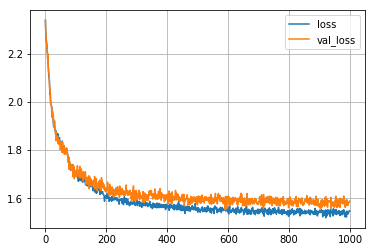

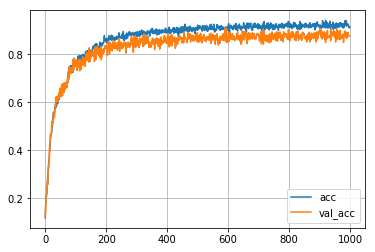

In [26]:
plt.plot(hist['loss'], label='loss')
plt.plot(hist['val_loss'], label='val_loss')
#plt.yscale('log')
plt.legend()
plt.grid(which='both')
plt.show()

plt.plot(hist['acc'], label='acc')
plt.plot(hist['val_acc'], label='val_acc')
#plt.yscale('log')
plt.legend()
plt.grid(which='both')
plt.show()